In [1]:
!pip install pillow numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Original Host Image:


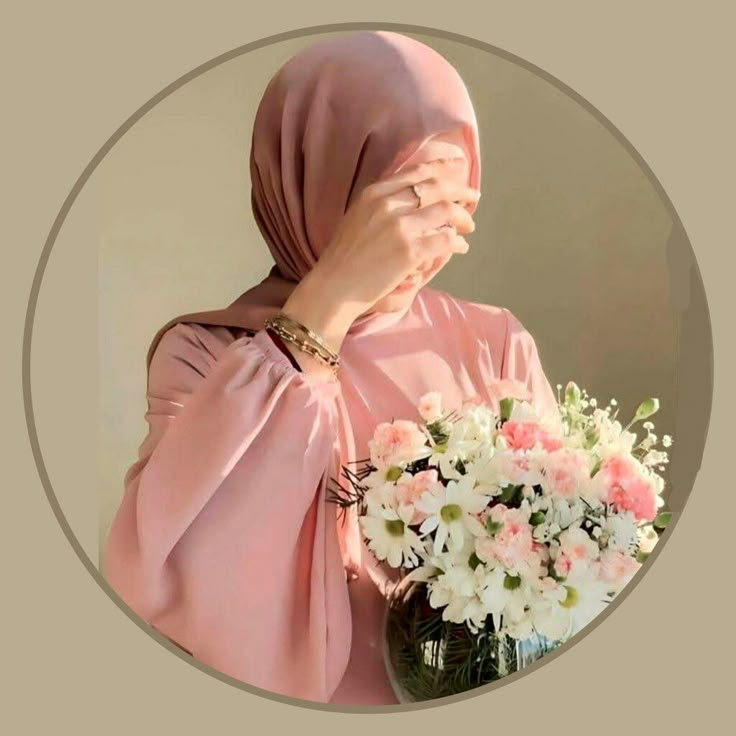


Secret Image to Hide:


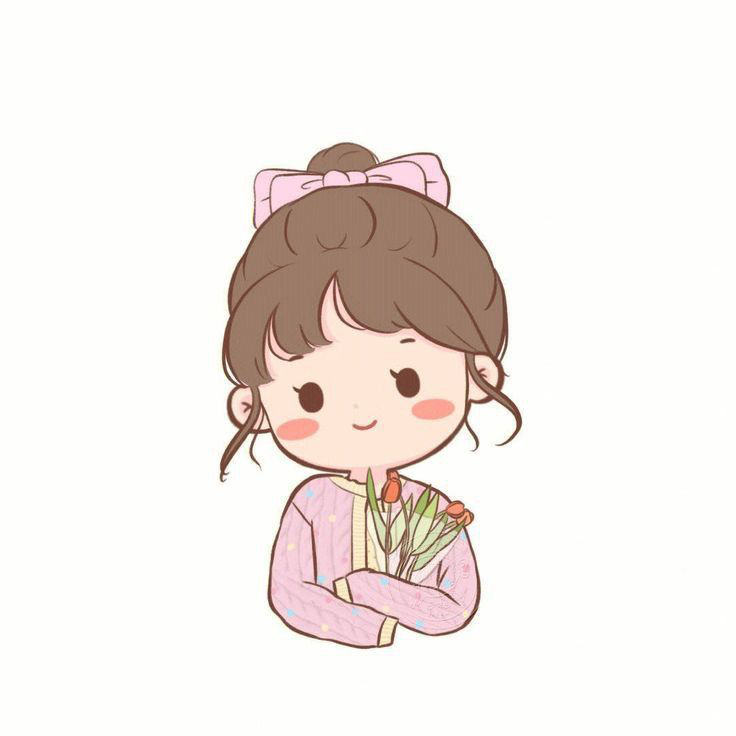


Encoded Image (with hidden secret):


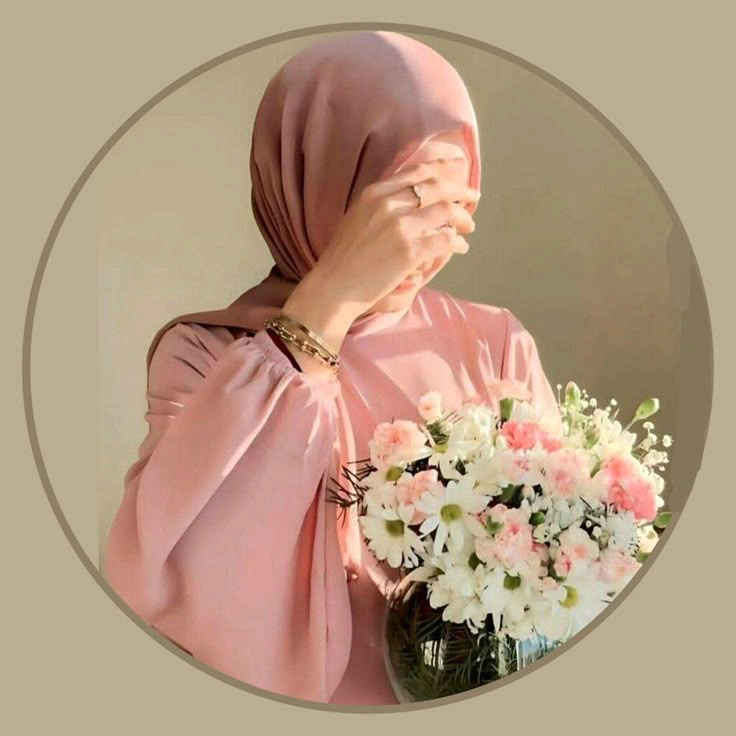


Decoded Secret Image:


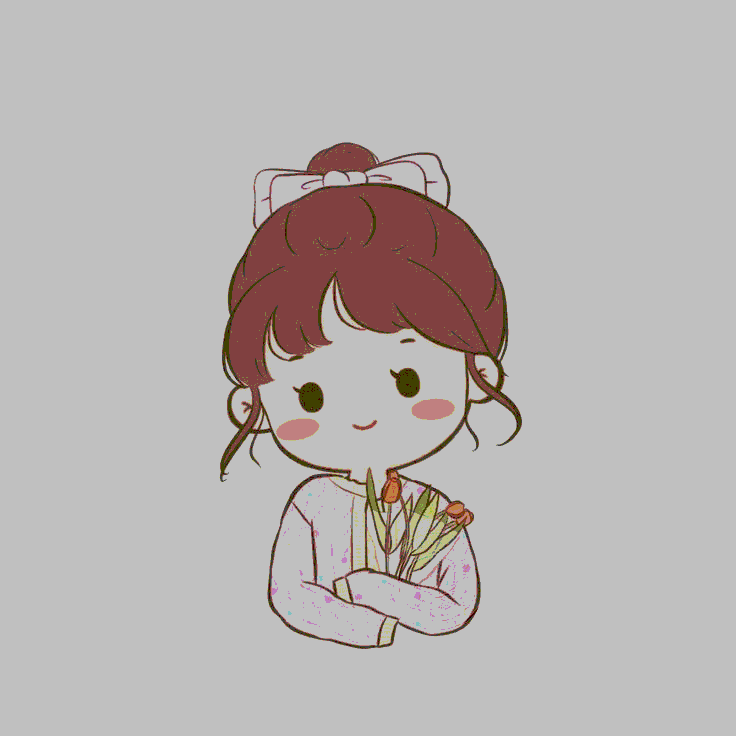

In [4]:
from PIL import Image
import numpy as np
from IPython.display import display

def encode_image(host_path, secret_path, output_path):
    host_img = Image.open(host_path).convert("RGB")
    secret_img = Image.open(secret_path).convert("RGB").resize(host_img.size)
    
    host_arr = np.array(host_img)
    secret_arr = np.array(secret_img)
    
    encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
    encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
    encoded_img.save(output_path)
    return encoded_img

def decode_image(encoded_path, output_path):
    encoded_img = Image.open(encoded_path).convert("RGB")
    encoded_arr = np.array(encoded_img)
    
    decoded_arr = (encoded_arr & 0b00000011) << 6
    decoded_img = Image.fromarray(decoded_arr.astype('uint8'))
    decoded_img.save(output_path)
    return decoded_img

if __name__ == "__main__":
    host_file = r"C:\Users\Arshad\Desktop\pics folder\hijab.jpg" 
    secret_file = r"C:\Users\Arshad\Desktop\pics folder\umme.jpg"
    encoded_file = "encoded.png"
    decoded_file = "decoded_secret.png"
    
    print("Original Host Image:")
    display(Image.open(host_file))
    
    print("\nSecret Image to Hide:")
    display(Image.open(secret_file))
    
    encoded_img = encode_image(host_file, secret_file, encoded_file)
    print("\nEncoded Image (with hidden secret):")
    display(encoded_img)
    
    decoded_img = decode_image(encoded_file, decoded_file)
    print("\nDecoded Secret Image:")
    display(decoded_img)



--- Image Metadata ---
ImageWidth: 281
ImageLength: 179
BitsPerSample: (8, 8, 8, 8)
Compression: 5
PhotometricInterpretation: 2
FillOrder: 1
StripOffsets: 8
Orientation: 1
SamplesPerPixel: 4
RowsPerStrip: 179
StripByteCounts: 85405
XResolution: 1.0
YResolution: 1.0
PlanarConfiguration: 1
286: 0.0
287: 0.0
ResolutionUnit: 2
PageNumber: (0, 1)
Predictor: 2
WhitePoint: (0.3127000033855438, 0.32899999618530273)
PrimaryChromaticities: (0.6399999856948853, 0.33000001311302185, 0.30000001192092896, 0.6000000238418579, 0.15000000596046448, 0.05999999865889549)
ExtraSamples: 2


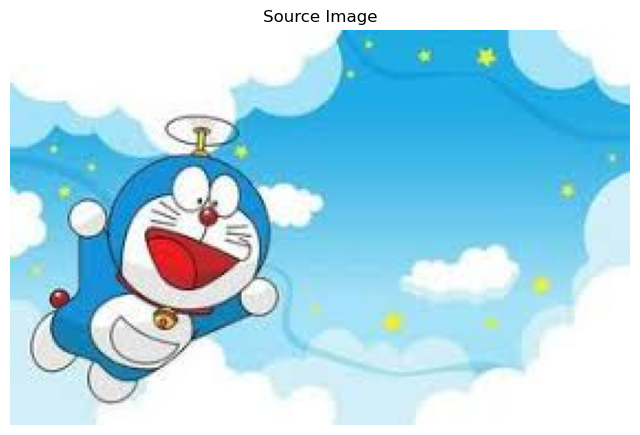

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL.ExifTags import TAGS  
import os
image_path = r"C:\Users\Arshad\Desktop\dore.tiff" 
def extract_metadata(image_path):
    if not os.path.exists(image_path):
        print("Error: Image file not found!")
        return None
    img = Image.open(image_path)
    metadata = {}
    if img.format == 'PNG':
        metadata = img.info  
    elif img.format in ('JPEG', 'TIFF'):
        exif_data = img.getexif()
        if exif_data:
            for tag_id, value in exif_data.items():
                tag_name = TAGS.get(tag_id, tag_id)
                metadata[tag_name] = value

    return metadata
metadata = extract_metadata(image_path)
if metadata:
    print("\n--- Image Metadata ---")
    for key, val in metadata.items():
        print(f"{key}: {val}")
else:
    print("No metadata found!")
plt.figure(figsize=(8, 6))
plt.imshow(Image.open(image_path), cmap='gray')
plt.axis('off')
plt.title("Source Image")
plt.show()

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import flush_figures
plt.show = flush_figures  

from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import os

class SteganographyApp:
    def _init_(self, master):
        self.master = master
        self.master.title("Image hiding  - Image Steganography")
        self.master.geometry("1280x720")

        self.colors = {
    'primary': '#ffffff',   # White
    'secondary': '#d3d3d3', # Light Gray
    'background': '#808080', # Gray
    'text': '#ffffff'       # White
}


        # Image Paths
        self.host_path = None
        self.secret_path = None
        self.encoded_path = None

        # Setup UI
        self.setup_styles()
        self.create_interface()

    def setup_styles(self):
        """Configure theme."""
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.master.configure(bg=self.colors['background'])

    def create_interface(self):
        """Create interface with encoding and decoding sections."""
        header = ttk.Frame(self.master)
        header.pack(fill=X, pady=10)
        
        ttk.Label(header, text="Image hiding - Image Steganography",
                  font=('Arial', 24, 'bold'), foreground=self.colors['primary']).pack(side=LEFT, padx=20)

        self.main_notebook = ttk.Notebook(self.master)
        self.main_notebook.pack(fill=BOTH, expand=True, padx=30, pady=20)

        # Encode Tab
        encode_tab = ttk.Frame(self.main_notebook)
        self.build_encode_interface(encode_tab)
        self.main_notebook.add(encode_tab, text="Encode Image")

        # Decode Tab
        decode_tab = ttk.Frame(self.main_notebook)
        self.build_decode_interface(decode_tab)
        self.main_notebook.add(decode_tab, text="Decode Image")

    def build_encode_interface(self, parent):
        """Build the encoding interface."""
        main_frame = ttk.Frame(parent)
        main_frame.pack(fill=BOTH, expand=True, pady=20)

        control_frame = ttk.Frame(main_frame)
        control_frame.pack(fill=X, pady=10)

        ttk.Button(control_frame, text="Load Host Image", command=self.upload_host).pack(side=LEFT, padx=10)
        ttk.Button(control_frame, text="Load Secret Image", command=self.upload_secret).pack(side=LEFT, padx=10)
        ttk.Button(control_frame, text="Encode Images", command=self.encode_images).pack(side=RIGHT, padx=10)

        self.host_label = Label(main_frame, text="No Host Image Loaded", fg="white", bg=self.colors['background'])
        self.host_label.pack()

        self.secret_label = Label(main_frame, text="No Secret Image Loaded", fg="white", bg=self.colors['background'])
        self.secret_label.pack()

    def build_decode_interface(self, parent):
        """Build the decoding interface."""
        main_frame = ttk.Frame(parent)
        main_frame.pack(fill=BOTH, expand=True, pady=20)

        control_frame = ttk.Frame(main_frame)
        control_frame.pack(fill=X, pady=10)

        ttk.Button(control_frame, text="Decode Image", command=self.decode_image).pack(side=RIGHT, padx=10)

        self.encoded_label = Label(main_frame, text="No Encoded Image Loaded", fg="white", bg=self.colors['background'])
        self.encoded_label.pack()

    def upload_host(self):
        """Load the host image."""
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.host_path = path
            img = Image.open(self.host_path)
            img = img.resize((300, 300))
            img = ImageTk.PhotoImage(img)
            self.host_label.config(image=img, text="")
            self.host_label.image = img  # Keep reference
            messagebox.showinfo("Success", "Host Image Loaded Successfully!")

    def upload_secret(self):
        """Load the secret image."""
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.secret_path = path
            img = Image.open(self.secret_path)
            img = img.resize((300, 300))
            img = ImageTk.PhotoImage(img)
            self.secret_label.config(image=img, text="")
            self.secret_label.image = img  # Keep reference
            messagebox.showinfo("Success", "Secret Image Loaded Successfully!")

    def encode_images(self):
        """Encode secret image into host image."""
        if not self.host_path or not self.secret_path:
            messagebox.showerror("Error", "Please select both images before encoding.")
            return

        try:
            output_path = os.path.join(os.getcwd(), "encoded_image.png")

            with Image.open(self.host_path) as host_img, Image.open(self.secret_path) as secret_img:
                host_img = host_img.convert("RGB")
                secret_img = secret_img.convert("RGB").resize(host_img.size)

                host_arr = np.array(host_img)
                secret_arr = np.array(secret_img)

                encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
                encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
                encoded_img.save(output_path)

                self.encoded_path = output_path

                # Show Encoded Image
                img = encoded_img.resize((300, 300))
                img = ImageTk.PhotoImage(img)
                self.encoded_label.config(image=img, text="")
                self.encoded_label.image = img  # Keep reference

                messagebox.showinfo("Success", "Image Encoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Encoding Error: {str(e)}")

    def decode_image(self):
        """Decode the secret image from the encoded image."""
        if not self.encoded_path or not os.path.exists(self.encoded_path):
            messagebox.showerror("Error", "No encoded image found!")
            return

        try:
            with Image.open(self.encoded_path) as encoded_img:
                encoded_img = encoded_img.convert("RGB")
                encoded_arr = np.array(encoded_img)

                secret_arr = (encoded_arr & 0b00000011) << 6
                decoded_img = Image.fromarray(secret_arr.astype('uint8'))

                # Show Decoded Image
                decoded_img.show()
                messagebox.showinfo("Success", "Image Decoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Decoding Error: {str(e)}")

if _name_ == "_main_":
    root = Tk()
    app = SteganographyApp(root)
    root.mainloop()

NameError: name '_name_' is not defined

In [7]:
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import os

class SteganographyApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Hiding - Image Steganography")
        self.master.geometry("900x600")
        self.master.configure(bg="#2C3E50")

        self.host_path = None
        self.secret_path = None
        self.encoded_path = None

        self.setup_styles()
        self.create_interface()

    def setup_styles(self):
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.style.configure("TButton", font=("Arial", 12), padding=8, background="#3498DB", foreground="white")
        self.style.map("TButton", background=[("active", "#2980B9")])

    def create_interface(self):
        header = Label(self.master, text="Image Hiding - Image Steganography", font=('Arial', 20, 'bold'), 
                       bg="#2C3E50", fg="white")
        header.pack(pady=10)

        self.main_notebook = ttk.Notebook(self.master)
        self.main_notebook.pack(fill=BOTH, expand=True, padx=20, pady=10)

        encode_tab = ttk.Frame(self.main_notebook)
        self.build_encode_interface(encode_tab)
        self.main_notebook.add(encode_tab, text="Encode Image")

        decode_tab = ttk.Frame(self.main_notebook)
        self.build_decode_interface(decode_tab)
        self.main_notebook.add(decode_tab, text="Decode Image")

    def build_encode_interface(self, parent):
        frame = Frame(parent, bg="#34495E")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Load Images for Encoding", font=("Arial", 14, "bold"), fg="white", bg="#34495E").pack(pady=10)
        
        btn_frame = Frame(frame, bg="#34495E")
        btn_frame.pack()
        ttk.Button(btn_frame, text="Load Host Image", command=self.upload_host).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Load Secret Image", command=self.upload_secret).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Encode Images", command=self.encode_images).pack(side=LEFT, padx=10, pady=10)

    def build_decode_interface(self, parent):
        frame = Frame(parent, bg="#34495E")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Decode Image", font=("Arial", 14, "bold"), fg="white", bg="#34495E").pack(pady=10)
        ttk.Button(frame, text="Decode Image", command=self.decode_image).pack(pady=20)

    def upload_host(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.host_path = path
            messagebox.showinfo("Success", "Host Image Loaded Successfully!")

    def upload_secret(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.secret_path = path
            messagebox.showinfo("Success", "Secret Image Loaded Successfully!")

    def encode_images(self):
        if not self.host_path or not self.secret_path:
            messagebox.showerror("Error", "Please select both images before encoding.")
            return
        try:
            output_path = "encoded_image.png"
            with Image.open(self.host_path) as host_img, Image.open(self.secret_path) as secret_img:
                host_img = host_img.convert("RGB")
                secret_img = secret_img.convert("RGB").resize(host_img.size)
                host_arr = np.array(host_img)
                secret_arr = np.array(secret_img)
                encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
                encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
                encoded_img.save(output_path)
                self.encoded_path = output_path
                messagebox.showinfo("Success", "Image Encoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Encoding Error: {str(e)}")

    def decode_image(self):
        if not self.encoded_path or not os.path.exists(self.encoded_path):
            messagebox.showerror("Error", "No encoded image found!")
            return
        try:
            with Image.open(self.encoded_path) as encoded_img:
                encoded_img = encoded_img.convert("RGB")
                encoded_arr = np.array(encoded_img)
                secret_arr = (encoded_arr & 0b00000011) << 6
                decoded_img = Image.fromarray(secret_arr.astype('uint8'))
                decoded_img.show()
                messagebox.showinfo("Success", "Image Decoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Decoding Error: {str(e)}")

if __name__ == "__main__":
    root = Tk()
    app = SteganographyApp(root)
    root.mainloop()


In [8]:
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import os

class SteganographyApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Hiding - Image Steganography")
        self.master.geometry("900x600")
        self.master.configure(bg="#2C3E50")

        self.host_path = None
        self.secret_path = None
        self.encoded_path = None
        self.host_img_label = None
        self.secret_img_label = None

        self.setup_styles()
        self.create_interface()

    def setup_styles(self):
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.style.configure("TButton", font=("Arial", 12), padding=8, background="#800000", foreground="white")
        self.style.map("TButton", background=[("active", "#A52A2A")])

    def create_interface(self):
        header = Label(self.master, text="Image Hiding - Image Steganography", font=('Arial', 20, 'bold'), 
                       bg="#2C3E50", fg="white")
        header.pack(pady=10)

        self.main_notebook = ttk.Notebook(self.master)
        self.main_notebook.pack(fill=BOTH, expand=True, padx=20, pady=10)

        encode_tab = ttk.Frame(self.main_notebook)
        self.build_encode_interface(encode_tab)
        self.main_notebook.add(encode_tab, text="Encode Image")

        decode_tab = ttk.Frame(self.main_notebook)
        self.build_decode_interface(decode_tab)
        self.main_notebook.add(decode_tab, text="Decode Image")

    def build_encode_interface(self, parent):
        frame = Frame(parent, bg="#34495E")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Load Images for Encoding", font=("Arial", 14, "bold"), fg="white", bg="#34495E").pack(pady=10)
        
        btn_frame = Frame(frame, bg="#34495E")
        btn_frame.pack()
        ttk.Button(btn_frame, text="Load Host Image", command=self.upload_host).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Load Secret Image", command=self.upload_secret).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Encode Images", command=self.encode_images).pack(side=LEFT, padx=10, pady=10)
        
        self.host_img_label = Label(frame, bg="#34495E")
        self.host_img_label.pack(pady=10)
        
        self.secret_img_label = Label(frame, bg="#34495E")
        self.secret_img_label.pack(pady=10)

    def build_decode_interface(self, parent):
        frame = Frame(parent, bg="#34495E")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Decode Image", font=("Arial", 14, "bold"), fg="white", bg="#34495E").pack(pady=10)
        ttk.Button(frame, text="Decode Image", command=self.decode_image).pack(pady=20)

    def upload_host(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.host_path = path
            img = Image.open(self.host_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.host_img_label.config(image=img)
            self.host_img_label.image = img
            messagebox.showinfo("Success", "Host Image Loaded Successfully!")

    def upload_secret(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.secret_path = path
            img = Image.open(self.secret_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.secret_img_label.config(image=img)
            self.secret_img_label.image = img
            messagebox.showinfo("Success", "Secret Image Loaded Successfully!")

    def encode_images(self):
        if not self.host_path or not self.secret_path:
            messagebox.showerror("Error", "Please select both images before encoding.")
            return
        try:
            output_path = "encoded_image.png"
            with Image.open(self.host_path) as host_img, Image.open(self.secret_path) as secret_img:
                host_img = host_img.convert("RGB")
                secret_img = secret_img.convert("RGB").resize(host_img.size)
                host_arr = np.array(host_img)
                secret_arr = np.array(secret_img)
                encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
                encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
                encoded_img.save(output_path)
                self.encoded_path = output_path
                encoded_img.show()
                messagebox.showinfo("Success", "Image Encoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Encoding Error: {str(e)}")

    def decode_image(self):
        if not self.encoded_path or not os.path.exists(self.encoded_path):
            messagebox.showerror("Error", "No encoded image found!")
            return
        try:
            with Image.open(self.encoded_path) as encoded_img:
                encoded_img = encoded_img.convert("RGB")
                encoded_arr = np.array(encoded_img)
                secret_arr = (encoded_arr & 0b00000011) << 6
                decoded_img = Image.fromarray(secret_arr.astype('uint8'))
                decoded_img.show()
                messagebox.showinfo("Success", "Image Decoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Decoding Error: {str(e)}")

if __name__ == "__main__":
    root = Tk()
    app = SteganographyApp(root)
    root.mainloop()

In [9]:
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import os

class SteganographyApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Hiding - Image Steganography")
        self.master.geometry("900x600")
        self.master.configure(bg="#8A9A5B")  # Sage Green Background

        self.host_path = None
        self.secret_path = None
        self.encoded_path = None
        self.host_img_label = None
        self.secret_img_label = None

        self.setup_styles()
        self.create_interface()

    def setup_styles(self):
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.style.configure("TButton", font=("Arial", 12), padding=8, background="#800000", foreground="white")
        self.style.map("TButton", background=[("active", "#A52A2A")])

    def create_interface(self):
        header = Label(self.master, text="Image Hiding - Image Steganography", font=('Arial', 20, 'bold'), 
                       bg="#8A9A5B", fg="white")
        header.pack(pady=10)

        self.main_notebook = ttk.Notebook(self.master)
        self.main_notebook.pack(fill=BOTH, expand=True, padx=20, pady=10)

        encode_tab = ttk.Frame(self.main_notebook)
        self.build_encode_interface(encode_tab)
        self.main_notebook.add(encode_tab, text="Encode Image")

        decode_tab = ttk.Frame(self.main_notebook)
        self.build_decode_interface(decode_tab)
        self.main_notebook.add(decode_tab, text="Decode Image")

    def build_encode_interface(self, parent):
        frame = Frame(parent, bg="#A4B787")  # Lighter Sage Green for contrast
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Load Images for Encoding", font=("Arial", 14, "bold"), fg="white", bg="#A4B787").pack(pady=10)
        
        btn_frame = Frame(frame, bg="#A4B787")
        btn_frame.pack()
        ttk.Button(btn_frame, text="Load Host Image", command=self.upload_host).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Load Secret Image", command=self.upload_secret).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Encode Images", command=self.encode_images).pack(side=LEFT, padx=10, pady=10)
        
        self.host_img_label = Label(frame, bg="#A4B787")
        self.host_img_label.pack(pady=10)
        
        self.secret_img_label = Label(frame, bg="#A4B787")
        self.secret_img_label.pack(pady=10)

    def build_decode_interface(self, parent):
        frame = Frame(parent, bg="#A4B787")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Decode Image", font=("Arial", 14, "bold"), fg="white", bg="#A4B787").pack(pady=10)
        ttk.Button(frame, text="Decode Image", command=self.decode_image).pack(pady=20)

    def upload_host(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.host_path = path
            img = Image.open(self.host_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.host_img_label.config(image=img)
            self.host_img_label.image = img
            messagebox.showinfo("Success", "Host Image Loaded Successfully!")

    def upload_secret(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.secret_path = path
            img = Image.open(self.secret_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.secret_img_label.config(image=img)
            self.secret_img_label.image = img
            messagebox.showinfo("Success", "Secret Image Loaded Successfully!")

    def encode_images(self):
        if not self.host_path or not self.secret_path:
            messagebox.showerror("Error", "Please select both images before encoding.")
            return
        try:
            output_path = "encoded_image.png"
            with Image.open(self.host_path) as host_img, Image.open(self.secret_path) as secret_img:
                host_img = host_img.convert("RGB")
                secret_img = secret_img.convert("RGB").resize(host_img.size)
                host_arr = np.array(host_img)
                secret_arr = np.array(secret_img)
                encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
                encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
                encoded_img.save(output_path)
                self.encoded_path = output_path
                encoded_img.show()
                messagebox.showinfo("Success", "Image Encoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Encoding Error: {str(e)}")

    def decode_image(self):
        if not self.encoded_path or not os.path.exists(self.encoded_path):
            messagebox.showerror("Error", "No encoded image found!")
            return
        try:
            with Image.open(self.encoded_path) as encoded_img:
                encoded_img = encoded_img.convert("RGB")
                encoded_arr = np.array(encoded_img)
                secret_arr = (encoded_arr & 0b00000011) << 6
                decoded_img = Image.fromarray(secret_arr.astype('uint8'))
                decoded_img.show()
                messagebox.showinfo("Success", "Image Decoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Decoding Error: {str(e)}")

if __name__ == "__main__":
    root = Tk()
    app = SteganographyApp(root)
    root.mainloop()

In [10]:
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import os

class SteganographyApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Image Hiding - Image Steganography")
        self.master.geometry("900x600")
        self.master.configure(bg="#8A9A5B")  # Sage Green Background

        self.host_path = None
        self.secret_path = None
        self.encoded_path = None
        self.host_img_label = None
        self.secret_img_label = None

        self.setup_styles()
        self.create_interface()

    def setup_styles(self):
        self.style = ttk.Style()
        self.style.theme_use('clam')
        self.style.configure("TButton", font=("Arial", 12), padding=8, background="#C71585", foreground="white")
        self.style.map("TButton", background=[("active", "#DB7093")])

    def create_interface(self):
        header = Label(self.master, text="Image Hiding - Image Steganography", font=('Arial', 20, 'bold'), 
                       bg="#8A9A5B", fg="white")
        header.pack(pady=10)

        self.main_notebook = ttk.Notebook(self.master)
        self.main_notebook.pack(fill=BOTH, expand=True, padx=20, pady=10)

        encode_tab = ttk.Frame(self.main_notebook)
        self.build_encode_interface(encode_tab)
        self.main_notebook.add(encode_tab, text="Encode Image")

        decode_tab = ttk.Frame(self.main_notebook)
        self.build_decode_interface(decode_tab)
        self.main_notebook.add(decode_tab, text="Decode Image")

    def build_encode_interface(self, parent):
        frame = Frame(parent, bg="#A4B787")  # Lighter Sage Green for contrast
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Load Images for Encoding", font=("Arial", 14, "bold"), fg="white", bg="#A4B787").pack(pady=10)
        
        btn_frame = Frame(frame, bg="#A4B787")
        btn_frame.pack()
        ttk.Button(btn_frame, text="Load Host Image", command=self.upload_host).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Load Secret Image", command=self.upload_secret).pack(side=LEFT, padx=10, pady=10)
        ttk.Button(btn_frame, text="Encode Images", command=self.encode_images).pack(side=LEFT, padx=10, pady=10)
        
        self.host_img_label = Label(frame, bg="#A4B787")
        self.host_img_label.pack(pady=10)
        
        self.secret_img_label = Label(frame, bg="#A4B787")
        self.secret_img_label.pack(pady=10)

    def build_decode_interface(self, parent):
        frame = Frame(parent, bg="#A4B787")
        frame.pack(fill=BOTH, expand=True)

        Label(frame, text="Decode Image", font=("Arial", 14, "bold"), fg="white", bg="#A4B787").pack(pady=10)
        ttk.Button(frame, text="Decode Image", command=self.decode_image).pack(pady=20)

    def upload_host(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.host_path = path
            img = Image.open(self.host_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.host_img_label.config(image=img)
            self.host_img_label.image = img
            messagebox.showinfo("Success", "Host Image Loaded Successfully!")

    def upload_secret(self):
        path = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if path:
            self.secret_path = path
            img = Image.open(self.secret_path)
            img = img.resize((250, 250))
            img = ImageTk.PhotoImage(img)
            self.secret_img_label.config(image=img)
            self.secret_img_label.image = img
            messagebox.showinfo("Success", "Secret Image Loaded Successfully!")

    def encode_images(self):
        if not self.host_path or not self.secret_path:
            messagebox.showerror("Error", "Please select both images before encoding.")
            return
        try:
            output_path = "encoded_image.png"
            with Image.open(self.host_path) as host_img, Image.open(self.secret_path) as secret_img:
                host_img = host_img.convert("RGB")
                secret_img = secret_img.convert("RGB").resize(host_img.size)
                host_arr = np.array(host_img)
                secret_arr = np.array(secret_img)
                encoded_arr = (host_arr & 0b11111100) | (secret_arr >> 6)
                encoded_img = Image.fromarray(encoded_arr.astype('uint8'))
                encoded_img.save(output_path)
                self.encoded_path = output_path
                encoded_img.show()
                messagebox.showinfo("Success", "Image Encoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Encoding Error: {str(e)}")

    def decode_image(self):
        if not self.encoded_path or not os.path.exists(self.encoded_path):
            messagebox.showerror("Error", "No encoded image found!")
            return
        try:
            with Image.open(self.encoded_path) as encoded_img:
                encoded_img = encoded_img.convert("RGB")
                encoded_arr = np.array(encoded_img)
                secret_arr = (encoded_arr & 0b00000011) << 6
                decoded_img = Image.fromarray(secret_arr.astype('uint8'))
                decoded_img.show()
                messagebox.showinfo("Success", "Image Decoded Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Decoding Error: {str(e)}")

if __name__ == "__main__":
    root = Tk()
    app = SteganographyApp(root)
    root.mainloop()